# CAMS Data Visualization Example - Map
## Description
This script illustrates some examples to visualize the CAMS data in map.   

In [1]:
import os
import xarray as xr

cwd = os.getcwd()
cwd_CAMS = cwd + "\\CAMS"
cwd_NUTS = cwd + "\\NUTS"
cwd_CAMS_2021 = cwd_CAMS + "\\2021"
cwd_CAMS_2021_NO2 = cwd_CAMS_2021 + "\\NO2"
cwd_CAMS_2021_O3 = cwd_CAMS_2021 + "\\O3"
cwd_CAMS_2021_PM10 = cwd_CAMS_2021 + "\\PM10"
cwd_CAMS_2021_PM25 = cwd_CAMS_2021 + "\\PM25"
from Function import myPlot

## Data Visualization - Italy
Visualize the concentration of NO2 at each pixel within the bounding box of Italy in Jan 2021. 

In [2]:
# Import xarray data
ds = xr.open_dataset(cwd_CAMS_2021_NO2 + '\\Edit_NO2202101.nc').mean(dim='time')
ds

<xarray.Dataset>
Dimensions:    (longitude: 119, latitude: 116)
Coordinates:
  * longitude  (longitude) float32 6.65 6.75 6.85 6.95 ... 18.25 18.35 18.45
  * latitude   (latitude) float32 47.05 46.95 46.85 46.75 ... 35.75 35.65 35.55
Data variables:
    no2_conc   (latitude, longitude) float32 7.932 8.082 9.282 ... 1.801 1.805

In [3]:
# Create a data array from the dataset, since there is only 1 variable
ds_to_da = ds.to_array()
# Remove "variable" dimension since it is useless except for identification
da = ds_to_da.mean(dim='variable')
da

<xarray.DataArray (latitude: 116, longitude: 119)>
array([[ 7.932098 ,  8.081984 ,  9.28191  , ...,  9.307402 ,  9.578162 ,
         9.6150875],
       [ 7.8594084,  8.733177 , 10.404178 , ...,  9.00018  ,  8.83642  ,
         8.85825  ],
       [ 9.264616 , 10.75794  , 11.2960205, ...,  8.206302 ,  8.2371855,
         8.314412 ],
       ...,
       [ 1.8368564,  1.8129712,  1.797968 , ...,  1.8639739,  1.8180264,
         1.7399753],
       [ 1.810734 ,  1.7258602,  1.6395177, ...,  1.8429657,  1.8532516,
         1.8375487],
       [ 1.4520489,  1.5310642,  1.5607464, ...,  1.7950159,  1.8014807,
         1.804885 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 6.65 6.75 6.85 6.95 ... 18.25 18.35 18.45
  * latitude   (latitude) float32 47.05 46.95 46.85 46.75 ... 35.75 35.65 35.55

In [4]:
import cartopy.crs as ccrs

# String Parameters for plot function
ds_pollutant = 'NO2'
ds_name = 'NO2 January 2021'
goodColor = 'Green'
badColor = 'Red'
timescale = 'Daily'
ds_unit = 'μg/m3'

# Other parameteres which can be obtained via dataset itself
ds_threshold = myPlot.plot_Threshold(ds_pollutant,timescale)
ds_longitude = ds.longitude
ds_latitude = ds.latitude

# This value is used for threshold map
ds_max = da.max().data

# This value is used for heat map, which will use it as the max value in colorbar legend. 
ds_max_ceiling = ds_max.round(-1) if (ds_max%10>5) else (ds_max.round(-1)+10)

(<Figure size 1440x720 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'NO2 January 2021'}>)

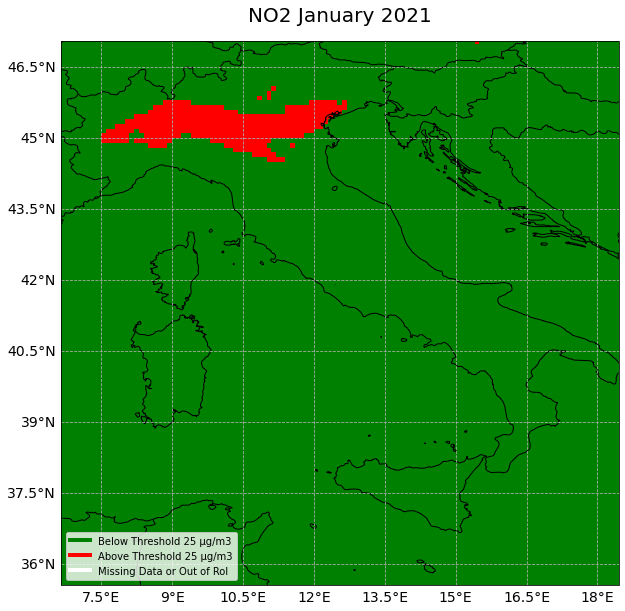

In [5]:
myPlot.plot_ThresholdMap(
    data_array=da,
    longitude=ds_longitude,
    latitude=ds_latitude,
    projection=ccrs.PlateCarree(),
    long_name=ds_name,
    vmin=0,
    vmax=ds_max,
    threshold = ds_threshold,
    GoodColor=goodColor,
    BadColor=badColor,
    lonmin=ds_longitude.min().data,
    lonmax=ds_longitude.max().data,
    latmin=ds_latitude.min().data,
    latmax=ds_latitude.max().data,
    set_global=False
)

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'NO2 January 2021'}>)

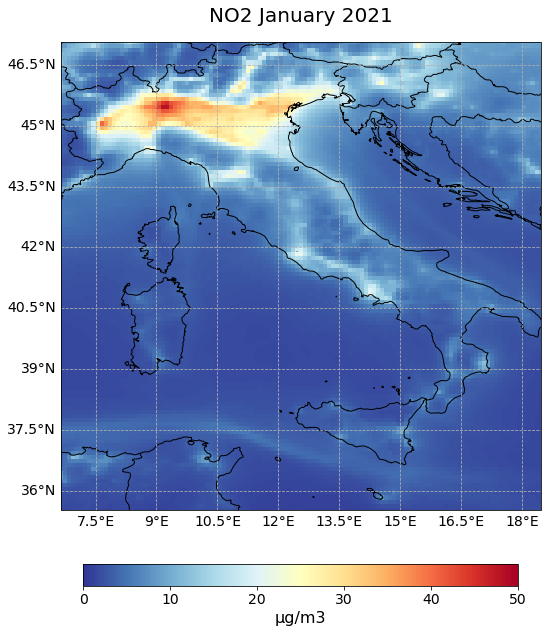

In [6]:
myPlot.plot_HeatMap(
    data_array=da,
    longitude=ds_longitude,
    latitude=ds_latitude,
    projection=ccrs.PlateCarree(),
    long_name=ds_name,
    color_scale='RdYlBu_r',
    unit=ds_unit,
    vmin=0,
    vmax=ds_max_ceiling,
    lonmin=ds_longitude.min().data,
    lonmax=ds_longitude.max().data,
    latmin=ds_latitude.min().data,
    latmax=ds_latitude.max().data,
    set_global=False
)

## Data Visualization - Lombardy
Visualize the concentration of NO2 at each pixel constrained within Lombardy in Jan 2021. 

In [11]:
# Import xarray data
ds_Lom = xr.open_dataset(cwd_CAMS_2021_NO2 + '\\Lom_NO2202101.nc').mean(dim='time').drop_vars('spatial_ref')
ds_Lom

<xarray.Dataset>
Dimensions:    (latitude: 19, longitude: 28)
Coordinates:
  * longitude  (longitude) float32 8.55 8.65 8.75 8.85 ... 11.05 11.15 11.25
  * latitude   (latitude) float32 46.55 46.45 46.35 46.25 ... 44.95 44.85 44.75
Data variables:
    no2_conc   (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan

In [13]:
# Create a data array from the dataset, since there is only 1 variable
ds_Lom_to_da = ds_Lom.to_array()
# Remove "variable" dimension since it is useless except for identification
da_Lom = ds_Lom_to_da.mean(dim='variable')
da_Lom

<xarray.DataArray (latitude: 19, longitude: 28)>
array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,  5.1459675,  4.9442415,  6.652154 ,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,  7.0682216,  4.686318 ,
               nan,        nan,        nan,        nan,        nan,
         3.9681268,  4.3073077,  6.5059934, 10.201108 ,  7.6009655,
         4.148987 ,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,  9.168655 ,  5.5036793,
               nan,        nan,        nan,  3.6534903,  3.638012 ,
               nan,  5.060115 ,  6.997219 ,  8.246932 ,  5.0962853,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,  7.956331 , 10.866535 ,  9.597385 ,
...
        27.516453 , 27.260471 , 27.763416 , 27.894491 , 27.024826 ,
        26.689018 , 26.627039 ,        nan],
       [       nan,        nan,        nan,        nan,        nan,
        22.236784 , 16.946402 , 15.300251 ,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 29.335749 ,
        29.368797 , 27.811588 , 27.52661  , 27.74128  , 26.231802 ,
        25.551779 , 24.470415 , 23.84826  ],
       [       nan,        nan,        nan,        nan,        nan,
        15.187402 , 11.394169 ,  9.913085 ,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,  7.0869694,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 8.55 8.65 8.75 8.85 ... 11.05 11.15 11.25
  * latitude   (latitude) float32 46.55 46.45 46.35 46.25 ... 44.95 44.85 44.75

In [14]:
# Other parameteres which can be obtained via dataset itself
ds_Lom_longitude = ds_Lom.longitude
ds_Lom_latitude = ds_Lom.latitude

# This value is used for threshold map
ds_Lom_max = da_Lom.max().data

# This value is used for heat map, which will use it as the max value in colorbar legend. 
ds_Lom_max_ceiling = ds_Lom_max.round(-1) if (ds_Lom_max%10>5) else (ds_Lom_max.round(-1)+10)

(<Figure size 1440x720 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'NO2 January 2021'}>)

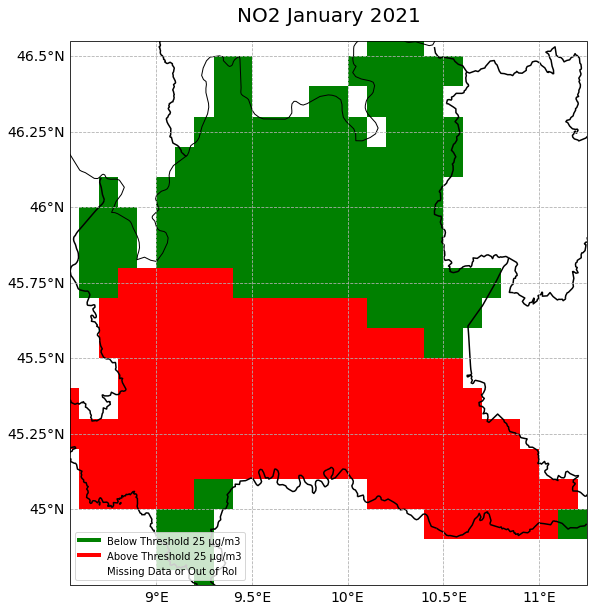

In [15]:
myPlot.plot_ThresholdMap_Prov(
    data_array=da_Lom,
    longitude=ds_Lom_longitude,
    latitude=ds_Lom_latitude,
    projection=ccrs.PlateCarree(),
    long_name=ds_name,
    vmin=0,
    vmax=ds_Lom_max,
    threshold = ds_threshold,
    GoodColor=goodColor,
    BadColor=badColor,
    lonmin=ds_Lom_longitude.min().data,
    lonmax=ds_Lom_longitude.max().data,
    latmin=ds_Lom_latitude.min().data,
    latmax=ds_Lom_latitude.max().data,
    set_global=False
)

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'NO2 January 2021'}>)

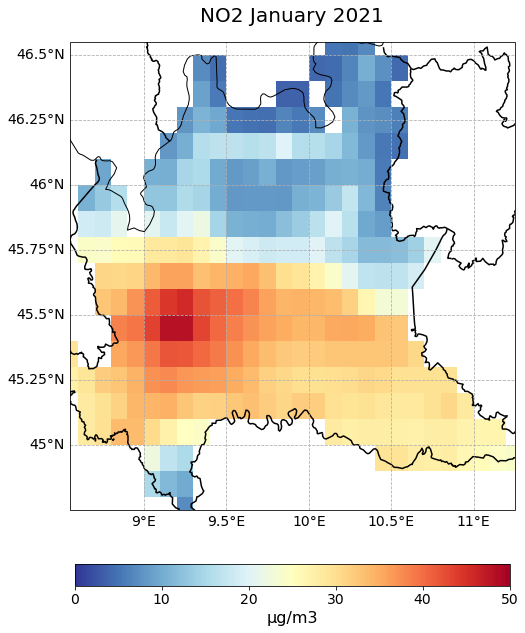

In [17]:
myPlot.plot_HeatMap_Prov(
    data_array=da_Lom,
    longitude=ds_Lom_longitude,
    latitude=ds_Lom_latitude,
    projection=ccrs.PlateCarree(),
    long_name=ds_name,
    color_scale='RdYlBu_r',
    unit=ds_unit,
    vmin=0,
    vmax=ds_max_ceiling,
    lonmin=ds_Lom_longitude.min().data,
    lonmax=ds_Lom_longitude.max().data,
    latmin=ds_Lom_latitude.min().data,
    latmax=ds_Lom_latitude.max().data,
    set_global=False
)